In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Symulation for one year evry 5 min
Data INDEX TimeStamp

In [2]:
# Time Paramiters DatetimeIndex
start_date = '2024-01-01 00:00:00'
end_date = '2025-01-01 00:00:00'
date_range = pd.date_range(start=start_date, end=end_date, freq='5min')

# DataFrame with Time in index
df = pd.DataFrame(index=date_range)
df.index.name = 'Timestamp'

**Key Performance Indicators (KPI) for typical noise:**
- **Success_Rate** in establishing connection: typically around **99,9%**
- **RTT_ms (Round-Trip Time)** — average network delay: approximately **45 ms**
- **Utilization_perc** — network utilization (%) around  **32,5%**

In [3]:
# rng: Random Number Generator (with fixed seed) for generating synthetic data using a normal distribution
rng = np.random.default_rng(seed=42) 
sr_base = rng.normal(99.95, 0.02, size=len(df))
df['Success_Rate'] = np.clip(sr_base, 0.0, 100.0)
rtt_base = rng.normal(45, 2.5, size=len(df))
df['RTT_ms'] = np.clip(rtt_base, 1.0,  75.0) 
util_base = rng.normal(32.5, 1.5, size=len(df))
df['Utilization_perc'] = np.clip(util_base, 0.0, 100.0)
print (df)

                     Success_Rate     RTT_ms  Utilization_perc
Timestamp                                                     
2024-01-01 00:00:00     99.956094  46.646810         33.815667
2024-01-01 00:05:00     99.929200  49.949877         34.705480
2024-01-01 00:10:00     99.965009  42.147385         33.026384
2024-01-01 00:15:00     99.968811  48.934808         32.568784
2024-01-01 00:20:00     99.910979  46.942862         33.181442
...                           ...        ...               ...
2024-12-31 23:40:00     99.986619  40.923682         35.398752
2024-12-31 23:45:00     99.947281  44.847755         30.157769
2024-12-31 23:50:00     99.923113  46.224550         35.406930
2024-12-31 23:55:00     99.962655  45.036379         33.315565
2025-01-01 00:00:00     99.948722  45.733994         33.244405

[105409 rows x 3 columns]


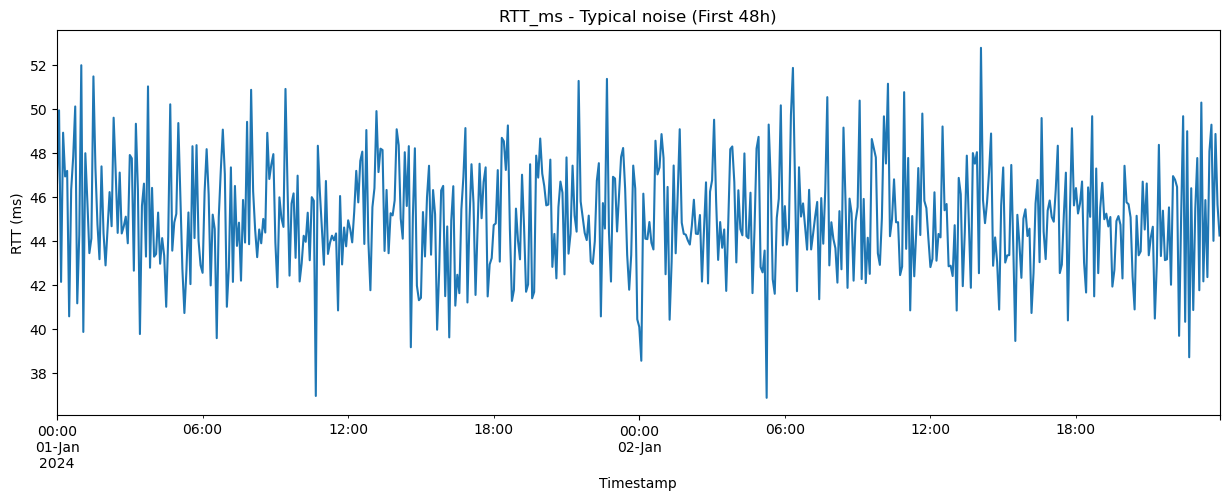

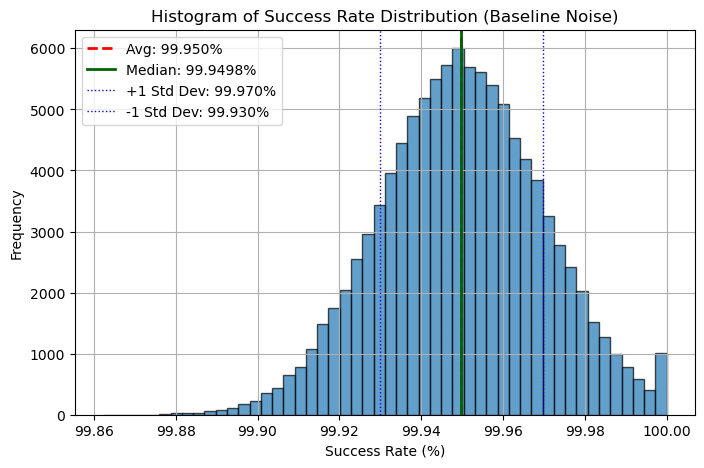

In [7]:
plt.figure(figsize=(15, 5))
df['RTT_ms'].head(48 * 12).plot() # 48 godzin * 12 pomiarów na godzinę
plt.title('RTT_ms - Typical noise (First 48h)')
plt.ylabel('RTT (ms)')
plt.show()

# 1. Obliczanie statystyk
mean_sr = df['Success_Rate'].mean()
std_sr = df['Success_Rate'].std()
median_sr = df['Success_Rate'].median()

plt.figure(figsize=(8, 5))
df['Success_Rate'].hist(bins=50, edgecolor='black', alpha=0.7) # Ulepszona estetyka histogramu

# 2. Wizualizacja Średniej (Mean/Avg)
plt.axvline(mean_sr, color='red', linestyle='dashed', linewidth=2, 
            label=f'Avg: {mean_sr:.3f}%')
# 3. Wizualizacja Mediany (Median)
plt.axvline(median_sr, color='darkgreen', linestyle='solid', linewidth=2, 
            label=f'Median: {median_sr:.4f}%')

# 3. Wizualizacja Odchylenia Standardowego (+/- 1 sigma)
plt.axvline(mean_sr + std_sr, color='blue', linestyle='dotted', linewidth=1, 
            label=f'+1 Std Dev: {(mean_sr + std_sr):.3f}%')
plt.axvline(mean_sr - std_sr, color='blue', linestyle='dotted', linewidth=1, 
            label=f'-1 Std Dev: {(mean_sr - std_sr):.3f}%')

plt.title('Histogram of Success Rate Distribution (Baseline Noise)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()